<a href="https://colab.research.google.com/github/OlimpiaGarcia/Book_algorithm/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [430]:
# imports generales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno  as msno
import ast
import xgboost as xgb


# imports de modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# imports de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

# conexión con google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leer csv de drive

In [431]:
ruta_dir = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/train"

# Creacion de DF

## leer CSV y pasarlo a DF

In [432]:
data = pd.read_csv(os.path.join(ruta_dir, 'train_scaled.csv'), encoding='utf-8')

In [433]:
text = pd.read_csv(os.path.join(ruta_dir, 'train_text.csv'), encoding='utf-8')

In [434]:
data.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
2396,2396,-0.079125,-0.168899,-0.248402,1.228739,-0.113987,-0.199051,-0.227717,-0.223922,-0.163550,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4601,4601,1.475563,0.508923,0.126445,0.227862,0.499568,0.437843,0.421098,0.546089,1.120274,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7781,7781,-0.142420,-0.012664,-0.048113,-1.349277,-0.111628,-0.039163,0.203662,0.383498,0.187986,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4561,4561,-1.087891,-0.175838,-0.129670,0.652477,-0.147031,-0.176748,-0.218249,-0.198754,-0.160979,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1735,1735,-1.313380,-0.254041,-0.321045,0.379510,-0.216158,-0.277977,-0.280246,-0.247891,-0.180152,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1648,1648,-0.083081,0.631410,0.990447,0.409840,0.618922,0.586347,0.590325,0.637505,0.670732,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7169,7169,0.494488,-0.197552,-0.208509,0.773795,-0.153719,-0.224705,-0.247356,-0.202549,-0.125633,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7287,7287,-0.427248,0.135307,0.563504,-0.075434,0.003619,0.304043,0.254351,0.060246,-0.070043,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
6737,6737,0.063289,0.515088,1.638227,0.227862,0.394072,0.624605,0.609158,0.515395,0.245719,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4774,4774,-0.253186,-0.217249,-0.266863,-0.166423,-0.195396,-0.231436,-0.217132,-0.206278,-0.167406,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [435]:
text.sample(10)

,id,cover_image_uri,book_title,book_details
7105,7105,https://images-na.ssl-images-amazon.com/images...,This Book Is Not Good for You,Between the pages of this book lies the secret...
4355,4355,https://images-na.ssl-images-amazon.com/images...,Cancer: It can be a lonely journey,Husband dealing with wife's cancer
11951,11951,https://images-na.ssl-images-amazon.com/images...,Book One: Sporadic Memories,Book One: Sporadic Memories is a novel about a...
5,5,https://images-na.ssl-images-amazon.com/images...,North! or Be Eaten,First they found themselves On the Edge of th...
10310,10310,https://images-na.ssl-images-amazon.com/images...,Botchan,Like The Catcher in the Rye or The Adventures ...
4655,4655,https://images-na.ssl-images-amazon.com/images...,Postwar: A History of Europe Since 1945,"Almost a decade in the making, this much-antic..."
7404,7404,https://images-na.ssl-images-amazon.com/images...,Blink: The Power of Thinking Without Thinking,Drawing on cutting-edge neuroscience and psych...
4447,4447,https://images-na.ssl-images-amazon.com/images...,Wings,From a house on the edge of her family's dusty...
8580,8580,https://images-na.ssl-images-amazon.com/images...,The Ride of a Lifetime: Lessons Learned from 1...,A grand vision defined: The CEO of The Walt Di...
9094,9094,https://images-na.ssl-images-amazon.com/images...,The Last Child,Thirteen year-old Johnny Merrimon had the perf...


# Hacer que ambos DF usen la columna ID como indice

In [436]:
data.set_index('id', inplace=True)
text.set_index('id', inplace=True)

# Implementar KNN

Recomienda libros similares a partir de un ID usando KNN.

Parámetros:
  - id_libro: int, ID del libro de referencia.
  - df_numerico: DataFrame con características numéricas escaladas (indexado por 'id').
  - df_text: DataFrame con información textual (indexado por 'id').
  - n_recomendaciones: número de recomendaciones a devolver (sin contar el libro mismo).

Retorna:
  - DataFrame con títulos y descripciones de los libros recomendados.


In [437]:
def recomendar_librosKNN(id_libro, df_numerico, df_text, n_recomendaciones=10):

  # Entrenar KNN
  knn = NearestNeighbors(metric='cosine', algorithm='auto')
  knn.fit(df_numerico)

  # Vector del libro base
  vector_libro = df_numerico.loc[[id_libro]]

  # Obtener vecinos (sumamos 1 porque el primer resultado será el libro mismo)
  distancias, indices = knn.kneighbors(vector_libro, n_neighbors=n_recomendaciones + 1)

  # Ignorar el primer resultado (es el propio libro)
  indices_recomendados = indices[0][1:]
  ids_recomendados = df_numerico.iloc[indices_recomendados].index

  # Combinar con texto y devolver
  recomendaciones = df_text.loc[ids_recomendados][['book_title', 'book_details']]
  return recomendaciones

## Correr KNN

In [438]:
# Solicitar cuantos libros parecidos quieres:
#recomendaciones = int(input("¿Cuántos libros parecidos quieres?"))

# el libro es harry Potter 5
recomendar_librosKNN(10611, data, text)# Mandar n numero de lbors)

,book_title,book_details
id,,
12399,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...
12693,Harry Potter and the Deathly Hallows,"Harry has been burdened with a dark, dangerous..."
7595,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...
9483,The Tales of Beedle the Bard,"""The Tales of Beedle the Bard"" contains five r..."
10061,Harry Potter and the Cursed Child. Parts One a...,Based on an original new story by J.K. Rowling...
7671,Harry Potter and the Cursed Child: Parts One a...,"The eighth story, nineteen years later...It wa..."
8666,The Harry Potter Collection 1-4,"The exciting tales of Harry Potter, the young ..."
11682,"Harry Potter Boxed Set, Books 1-5",Box Set containing Harry Potter and the Sorcer...
7145,Harry Potter Schoolbooks: Quidditch Through th...,SHS0545007984 Features: -Subjects: Literacy Ce...


# Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [439]:
rating = pd.read_csv(os.path.join(ruta_dir, 'train_data.csv'), encoding='utf-8')

In [440]:
rating['average_rating']

,average_rating
0,4.24
1,4.26
2,4.00
3,4.03
4,3.84
...,...
12975,3.32
12976,3.58
12977,4.21
12978,4.46


In [441]:
data['average_rating_original'] = rating['average_rating'].values
data.drop('average_rating', axis=1, inplace=True)

In [442]:
data.sample(5).T

id,9800,5209,11788,2990,5050
num_pages,-0.810975,0.170100,0.039554,-0.205715,0.304602
num_ratings,-0.247649,-0.103813,-0.268415,-0.205725,-0.259100
num_reviews,-0.285071,-0.249414,-0.325344,-0.289307,-0.308970
rating_5,-0.218612,-0.163992,-0.229495,-0.165314,-0.220455
rating_4,-0.260978,-0.092993,-0.290323,-0.224012,-0.279703
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [443]:
data['rating_class'] = pd.cut(
  data['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [444]:
data['rating_class']

,rating_class
id,
0,3
1,3
2,2
3,3
4,2
...,...
12975,1
12976,2
12977,3


In [445]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data['rating_class'] = data['rating_class'].astype(int)

Checar como queedaron las clases:

In [446]:
print("Distribución de clases en rating_class:")
print(data['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      33
1     669
2    5348
3    6930
Name: count, dtype: int64


## Separar data en train y test:

uno sera nuestros datos de entrenamiento y el test el de evaluación

In [447]:
# checmos cuantos datos tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12980 entries, 0 to 12979
Columns: 8353 entries, num_pages to rating_class
dtypes: float64(8352), int64(1)
memory usage: 827.8 MB


Creamos una x donde dropeamos el average rating y el rating class ya que ese lo vamos a usar como la columna a predecir

In [448]:
# Separar X (features) e y (target)
X = data.drop(columns=['average_rating_original', 'rating_class'])
y = data['rating_class']  # Target: clases 0–5

# Dividir en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Creamos una x alternativa donde dropeamos tambien las columnas de rating para ver como afectan al modelo

In [449]:
X1 = data.drop(columns= ['average_rating_original', 'rating_class','rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'])
y1 = data['rating_class']  # Target: clases 0–5

# Dividir en entrenamiento y prueba (80% / 20%)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Funcion que evalua el modelo

In [450]:
def evaluar_modelo(y_test, y_pred):
  results = []
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  mae = mean_absolute_error(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  print(f"Accuracy: {acc}")
  print(f"F1 Score: {f1}")
  print(f"MAE: {mae}")
  print("Confusion Matrix:")
  print(cm)

  results.append(acc)
  results.append(f1)
  results.append(mae)
  results.append(cm)

  return results

# Decision tree

## Armar el modelo

Recibe:

- X_train: Conjunto de características para entrenamiento.

- X_test: Conjunto de características para prueba

- y_train: Clase target a producir

- y_test: Clase target para comprobar

- max_depth: Profundidad máxima del árbol de decisión

Retorna
- modelo decision tree

In [451]:
def entrenar_decision_tree(X_train, X_test, y_train, y_test, max_depth = 10):
  # Crear el modelo
  model_dtc = DecisionTreeClassifier(
    criterion= "entropy",     # Usa entropy como en el paper para dividir nodos
    random_state= 42,          # Asegura reproducibilidad del árbol
    max_depth= max_depth             # Limita la profundidad del árbol (reduce overfitting)
)

  # Entrenar
  model_dtc.fit(X_train, y_train)

  return model_dtc

## Correr el modelo 1

In [452]:
# entrenar arbol 1
modelo_arbol = entrenar_decision_tree(X_train, X_test, y_train, y_test)

# predecir arbol 1
y_pred = modelo_arbol.predict(X_test)

## correr modelo 2

In [453]:
# entrenar arbol 2
modelo_arbol2= entrenar_decision_tree(X1_train, X1_test, y1_train, y1_test)

# predecir arbol 2
y_pred2 = modelo_arbol2.predict(X1_test)

## Evaluacion

In [454]:
# evaluar arbol 1
decision_tree1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.9029275808936826
F1 Score: 0.9019789737280723
MAE: 0.09861325115562404
Confusion Matrix:
[[   3    1    2    0]
 [   1  102   29    2]
 [   0    8  922  140]
 [   0    0   69 1317]]


In [455]:
# evaluar arbol 2
decision_tree2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.6036209553158706
F1 Score: 0.587688567920189
MAE: 0.42295839753466874
Confusion Matrix:
[[   2    0    2    2]
 [   0    7   69   58]
 [   0   15  532  523]
 [   0    5  355 1026]]


# Knn Classifier

## Crear el modelo:
 Parámetros:
  - X_train: DataFrame de entrenamiento (features)
  - y_train: Series de clases (target)
  - n_neighbors: número de vecinos (default=10)

Retorna:
  - modelo_knn entrenado

In [456]:
def entrenar_knn(X_train, y_train, n_neighbors=10):
  model_knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Que tantos vecinos
  model_knn.fit(X_train, y_train)
  return model_knn

## correr el modelo 1



In [457]:
# entrenar
modelo_knn = entrenar_knn(X_train, y_train, n_neighbors=5)

# Predecir
y_pred = modelo_knn.predict(X_test)

## correr modelo 2

In [458]:
# entrenar
modelo_knn2 = entrenar_knn(X1_train, y1_train, n_neighbors=5)

# predecir
y_pred2 = modelo_knn2.predict(X1_test)

## Evaluación

In [459]:
# Evaluar modelo 1
knn1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.5546995377503852
F1 Score: 0.535668378717213
MAE: 0.450693374422188
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 120   8]
 [  0   6 845 219]
 [  0   1 797 588]]


In [460]:
# evaluar modelo 2
knn2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.5901386748844376
F1 Score: 0.579536641051604
MAE: 0.41910631741140214
Confusion Matrix:
[[  1   0   5   0]
 [  0   6 110  18]
 [  0   6 757 307]
 [  0   1 617 768]]


# Random Forest



## Crear el modelo:
Recibe:

- X_train: Df de entrenamiento.

- y_train: Clases a predecir.

- n_estimators: Número de árboles en el bosque aleatorio (default: 100).

- max_depth: Profundidad máxima de cada árbol individual.

In [461]:
def entrenar_random_forest(X_train, y_train, n_estimators=200, max_depth=10):
  modelo_rf = RandomForestClassifier(
    n_estimators=n_estimators,  # Número de árboles en el bosque
    max_depth=max_depth, # Que tan profundo es el arbol
    class_weight='balanced',  # Ajusta los pesos de clase para manejar desequilibrio
    random_state=42,
    n_jobs=-1  # Utiliza todos los núcleos disponibles para el entrenamiento
)
  modelo_rf.fit(X_train, y_train)
  return modelo_rf

## modelo 1

In [462]:
# entrenar modelo
modelo_rf = entrenar_random_forest(X_train, y_train)

# Predecir
y_pred = modelo_rf.predict(X_test)

## modelo 2

In [463]:
# Entrenar el modelo
modelo_rf2 = entrenar_random_forest(X1_train, y1_train)

# Predecir
y_pred2 = modelo_rf2.predict(X1_test)

## evaluación:

In [464]:
# Evaluar modelo 1
random_forest1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.5608628659476117
F1 Score: 0.5837713377005999
MAE: 0.5558551617873652
Confusion Matrix:
[[  4   2   0   0]
 [ 11  65  38  20]
 [ 36 140 553 341]
 [ 77  93 382 834]]


In [465]:
# Evaluar modelo 2
random_forest2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.5489214175654854
F1 Score: 0.5700677921142943
MAE: 0.5685670261941448
Confusion Matrix:
[[  4   1   1   0]
 [ 16  56  37  25]
 [ 38 135 516 381]
 [ 86  69 382 849]]


# XGBoost

## Crear el modelo:
Recibe:

- X_train: Df de entrenamiento.

- y_train: Clases a predecir.

- n_estimators: Número de árboles (default: 100).

- max_depth: Profundidad máxima de cada árbol individual.

In [466]:
def entrenar_xgboost(X_train, y_train, n_estimators=100, max_depth=6):
  modelo_xgb = xgb.XGBClassifier(
    n_estimators=n_estimators,               # Número de árboles en el modelo
    max_depth=max_depth,                     # Profundidad máxima de cada árbol
    objective='multi:softmax',               # hae quue el modelo rpediga directamente la clase con mayor probabilidad
    num_class=len(y_train.unique()),         # hace un len de los unios para sacar el num de clases (4)
    eval_metric='mlogloss',                  # Log loss multiclass que usa cross entropy
    random_state=42
    )
  modelo_xgb.fit(X_train, y_train)
  return modelo_xgb

## modelo 1

In [467]:
# Entrenar el modelo
modelo_xgb = entrenar_xgboost(X_train, y_train)

# Predecir
y_pred = modelo_xgb.predict(X_test)

## modelo 2

In [468]:
# Entrenar el modelo
modelo_xgb = entrenar_xgboost(X1_train, y1_train)

# Predecir
y_pred2 = modelo_xgb.predict(X1_test)


## Evaluación

In [469]:
# Evaluar modelo 1
xgb1 = evaluar_modelo(y_test, y_pred)

Accuracy: 0.9591679506933745
F1 Score: 0.9585461948103353
MAE: 0.04314329738058552
Confusion Matrix:
[[   2    2    0    2]
 [   0  109   25    0]
 [   0    7 1022   41]
 [   1    0   28 1357]]


In [470]:
# Evaluar modelo 2
xgb2 = evaluar_modelo(y1_test, y_pred2)

Accuracy: 0.6744992295839753
F1 Score: 0.655178433155781
MAE: 0.3447611710323575
Confusion Matrix:
[[   1    0    2    3]
 [   0    2   95   37]
 [   0    7  633  430]
 [   1    3  267 1115]]


# Comparación entre todos :D

- Decision Tree 1
- Decision Tree 2

- Knn 1
- Knn 2

- Random Forest 1
- Random Forest 2

- XGB 1
- XGB 2

In [471]:
# Juntar los resultados
model_names = [
  "Decision Tree 1", "Decision Tree 2",
  "KNN 1", "KNN 2",
  "Random Forest 1", "Random Forest 2",
  "XGB 1", "XGB 2"
]

model_results = [
  decision_tree1, decision_tree2,
  knn1, knn2,
  random_forest1, random_forest2,
  xgb1, xgb2
]

# Separar métricas
acc_list = [res[0] for res in model_results]
f1_list = [res[1] for res in model_results]
mae_list = [res[2] for res in model_results]

# Crear DataFrame
df_results = pd.DataFrame({
  "Modelo": model_names,
  "Accuracy": acc_list,
  "F1-Score": f1_list,
  "MAE": mae_list,
})

In [472]:
df_results

,Modelo,Accuracy,F1-Score,MAE
0,Decision Tree 1,0.902928,0.901979,0.098613
1,Decision Tree 2,0.603621,0.587689,0.422958
2,KNN 1,0.554700,0.535668,0.450693
3,KNN 2,0.590139,0.579537,0.419106
4,Random Forest 1,0.560863,0.583771,0.555855
5,Random Forest 2,0.548921,0.570068,0.568567
6,XGB 1,0.959168,0.958546,0.043143
7,XGB 2,0.674499,0.655178,0.344761


In [473]:
# Lista de confussion matrix  de los resultados
cm_list = [
  decision_tree1[3], decision_tree2[3],
  knn1[3], knn2[3],
  random_forest1[3], random_forest2[3],
  xgb1[3], xgb2[3]
]

# Función para graficar todas las matrices
def plot_confusion_matrices(cm_list, model_names):
  fig, axes = plt.subplots(2, 4, figsize=(22, 10))  # 2 filas x 4 columnas
  axes = axes.flatten()

  for i, (cm, name) in enumerate(zip(cm_list, model_names)):
    ax = axes[i]
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
    tick_marks = np.arange(len(cm))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            ax.text(k, j, format(cm[j, k], 'd'),
                    ha="center", va="center",
                    color="white" if cm[j, k] > cm.max() / 2. else "black")

  plt.tight_layout()
  plt.show()

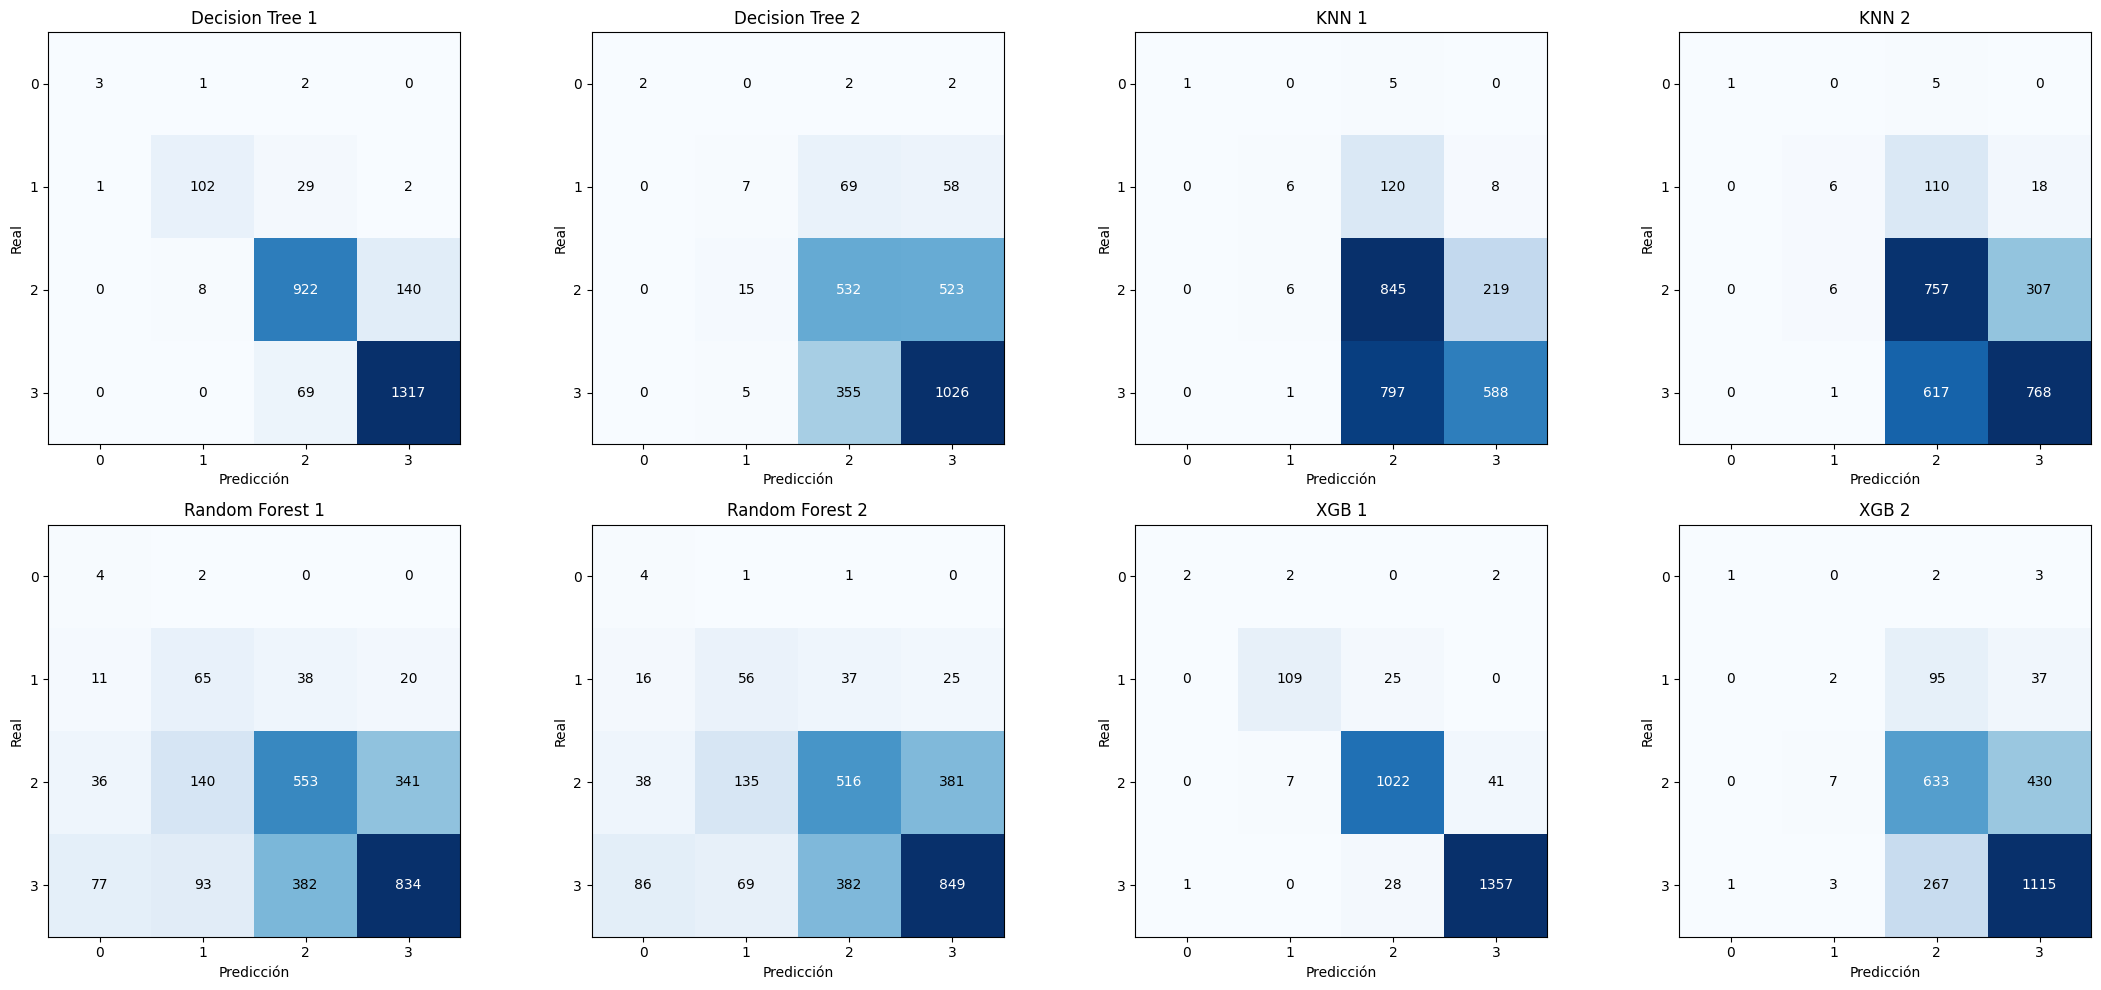

In [474]:
# Llamar la función para mostrar las matrices
plot_confusion_matrices(cm_list, model_names)

# Añadimos el set de Test

In [475]:
ruta_dir_test = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/test"

In [476]:
data_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_scaled.csv'), encoding='utf-8')

In [477]:
text_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_text.csv'), encoding='utf-8')

In [478]:
data_test.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
1923,1923,0.628990,0.228718,0.728326,0.591817,0.200867,0.335436,0.149933,0.049460,-0.015523,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
121,121,-0.276922,-0.268848,-0.324775,0.136873,-0.229832,-0.290881,-0.301105,-0.261008,-0.185400,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1696,1696,2.452682,-0.251760,-0.304354,0.834454,-0.213196,-0.271142,-0.287461,-0.251819,-0.180366,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1596,1596,-1.408323,-0.264912,-0.314470,0.622147,-0.225636,-0.287613,-0.297632,-0.256946,-0.181973,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
401,401,0.071201,-0.227576,-0.280014,-0.894333,-0.204931,-0.250803,-0.232368,-0.179512,-0.117921,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
881,881,-0.114728,-0.261129,-0.314597,-0.651696,-0.225846,-0.281182,-0.288164,-0.249289,-0.179081,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
528,528,0.466796,-0.009022,0.133020,1.016432,0.050770,-0.026424,-0.119598,-0.113264,-0.083538,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1017,1017,1.095792,-0.258797,-0.315229,0.864784,-0.220608,-0.277677,-0.293477,-0.258078,-0.183472,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
3203,3203,0.122629,-0.234570,-0.265093,0.440169,-0.203514,-0.242800,-0.267987,-0.242831,-0.173725,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1366,1366,-0.332305,-0.268418,-0.322246,-0.409059,-0.229692,-0.290136,-0.300402,-0.260941,-0.184758,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [479]:
text_test.sample(10)

,id,cover_image_uri,book_title,book_details
115,115,https://images-na.ssl-images-amazon.com/images...,And the Ass Saw the Angel,Cave’s debut novel takes on the southern gothi...
2763,2763,https://images-na.ssl-images-amazon.com/images...,Six of Crows,▶ \nACE #1\n▶ \nACE #2\nCriminal prodigy Kaz B...
2070,2070,https://images-na.ssl-images-amazon.com/images...,Το 10,"""Το 10"" αποτελεί κρίσιμη καμπή στο έργο του Μ...."
2432,2432,https://images-na.ssl-images-amazon.com/images...,The Insulted and Humiliated,In this novel we see a young man madly in love...
2297,2297,https://images-na.ssl-images-amazon.com/images...,Angels Flight,Famed Gossip Columnist Murdered at Séance in A...
1595,1595,https://images-na.ssl-images-amazon.com/images...,The Alteration,In Kingsley Amis’s virtuoso foray into virtual...
1594,1594,https://images-na.ssl-images-amazon.com/images...,Flutter,Flutter - the third book in the My Blood Appro...
1939,1939,https://images-na.ssl-images-amazon.com/images...,Wolf Hustle: A Black Woman on Wall Street,From the South Bronx projects to the boardroom...
532,532,https://images-na.ssl-images-amazon.com/images...,The Temple of the Golden Pavilion,"In The Temple of the Golden Pavilion, celebra..."
69,69,https://images-na.ssl-images-amazon.com/images...,What the Torah Teaches us About Survival: A Sp...,Turning the tables on a traumatic period in on...


## Hacer que ambos DF usen la columna ID como indice

In [480]:
data_test.set_index('id', inplace=True)
text_test.set_index('id', inplace=True)

## Añadimos el data set de test sin esclaar para hacer el target

## Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [481]:
rating_test = pd.read_csv(os.path.join(ruta_dir_test, 'test_data.csv'), encoding='utf-8')

In [482]:
rating_test['average_rating']

,average_rating
0,3.73
1,3.96
2,3.98
3,3.66
4,3.87
...,...
3240,4.35
3241,4.03
3242,3.88
3243,4.53


In [483]:
data_test['average_rating_original'] = rating_test['average_rating'].values
data_test.drop('average_rating', axis=1, inplace=True)

In [484]:
data_test.sample(5).T

id,2920,2629,1357,2623,2894
num_pages,-0.312526,0.411413,1.321281,0.181968,-0.201759
num_ratings,-0.216174,-0.256491,-0.262249,0.217055,1.420465
num_reviews,-0.201997,-0.321677,-0.315355,0.662448,2.052463
rating_5,-0.194773,-0.219171,-0.222973,-0.023564,1.264071
rating_4,-0.218128,-0.275505,-0.284212,0.240731,1.584946
...,...,...,...,...,...
يحيى بن شرف النووي,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778
يوسف زيدان,0.000000,0.000000,0.000000,0.000000,0.000000
ปรีดี พนมยงค์,0.000000,0.000000,0.000000,0.000000,0.000000
နုနုရည်အင်းဝ,-0.008778,-0.008778,-0.008778,-0.008778,-0.008778


## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [485]:
data_test['rating_class'] = pd.cut(
  data_test['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [486]:
data_test['rating_class']

,rating_class
id,
0,2
1,2
2,2
3,2
4,2
...,...
3240,3
3241,3
3242,2


In [487]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data_test['rating_class'] = data_test['rating_class'].astype(int)

Checar como queedaron las clases:

In [488]:
print("Distribución de clases en rating_class:")
print(data_test['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      19
1     179
2    1347
3    1700
Name: count, dtype: int64


# Comprobar el modelo con los datos de test